In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [166]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [167]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [168]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [169]:
features = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']

In [170]:
from sklearn.preprocessing import LabelEncoder

In [171]:
def encode(dataset,feature):
    lr = LabelEncoder()
    return lr.fit(dataset[feature]).transform(dataset[feature])

In [172]:
train.Gender.unique()
train.Gender.value_counts()
train.Gender.fillna('Male',inplace=True)
test.Gender.fillna('Male',inplace=True)
train.Gender = encode(train,'Gender')
test.Gender = encode(test,'Gender')

In [173]:
train.Married.unique()
train.Married.value_counts()
train.Married.fillna('Yes',inplace=True)
test.Married.fillna('Yes',inplace=True)
train.Married = encode(train,'Married')
test.Married = encode(test,'Married')

In [174]:
train.Dependents.value_counts()
train.Dependents.fillna('0',inplace=True)
train.Dependents = encode(train,'Dependents')
test.Dependents.fillna('0',inplace=True)
test.Dependents = encode(test,'Dependents')

In [175]:
train.Education.unique()
train.Education = encode(train,'Education')
train.Education = 1-train.Education
test.Education = encode(test,'Education')
test.Education = 1-test.Education

In [176]:
train.Self_Employed.unique()
train.Self_Employed.value_counts()
train.Self_Employed.fillna('No',inplace=True)
train.Self_Employed = encode(train,'Self_Employed')
test.Self_Employed.fillna('No',inplace=True)
test.Self_Employed = encode(test,'Self_Employed')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef2e2a5470>]], dtype=object)

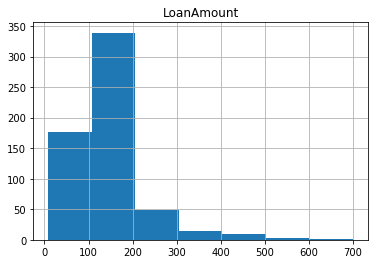

In [177]:
train.hist('LoanAmount',bins=7)

In [178]:
train.LoanAmount.fillna(np.mean(train.LoanAmount),inplace=True)
test.LoanAmount.fillna(np.mean(test.LoanAmount),inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef2e29e208>]], dtype=object)

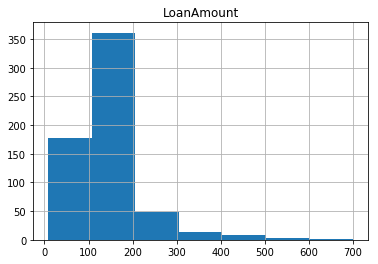

In [179]:
train.hist('LoanAmount',bins=7)

In [180]:
train.Loan_Amount_Term.unique()
train.Loan_Amount_Term.value_counts()
train.Loan_Amount_Term.fillna(np.mean(train.Loan_Amount_Term),inplace=True)
test.Loan_Amount_Term.fillna(np.mean(test.Loan_Amount_Term),inplace=True)

In [181]:
train.Credit_History.value_counts()
train.Credit_History.fillna(1.0,inplace=True)
test.Credit_History.fillna(1.0,inplace=True)

In [182]:
train.Property_Area.unique()
prop = pd.get_dummies(train.Property_Area,prefix = 'Property')
train = pd.concat([train,prop],axis=1)


In [183]:
prop1 = pd.get_dummies(test.Property_Area,prefix = 'Property')
test = pd.concat([test,prop1],axis=1)

In [184]:
train.Loan_Status.unique()
train.Loan_Status = encode(train,'Loan_Status')

In [185]:
train.drop(['Loan_ID','Property_Area'],axis=1,inplace=True)
t = test['Loan_ID']

In [186]:
test.drop(['Loan_ID','Property_Area'],axis=1,inplace=True)

In [187]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Rural,Property_Semiurban,Property_Urban
0,1,1,0,1,0,5720,0,110.0,360.0,1.0,0,0,1
1,1,1,1,1,0,3076,1500,126.0,360.0,1.0,0,0,1
2,1,1,2,1,0,5000,1800,208.0,360.0,1.0,0,0,1
3,1,1,2,1,0,2340,2546,100.0,360.0,1.0,0,0,1
4,1,0,0,0,0,3276,0,78.0,360.0,1.0,0,0,1


In [188]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
y = train.Loan_Status
X = train.drop(['Loan_Status'],axis=1)

In [189]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=0)

In [190]:
clf1 = DecisionTreeClassifier(max_depth=5,max_leaf_nodes=10)
clf1.fit(X_train,y_train)
print("Training Accuracy = {}".format(clf1.score(X_train,y_train)))
print('Testing Accuracy = {}'.format(clf1.score(X_test,y_test)))

Training Accuracy = 0.8205128205128205
Testing Accuracy = 0.8162162162162162


In [191]:
from sklearn.tree import export_graphviz
import graphviz
export_graphviz(clf1,feature_names = X.columns,impurity=False,filled=True)

/home/arpit/virtual_env_/allenv3/lib/python3.5/site-packages/sklearn/tree/export.py:386: DeprecationWarning: out_file can be set to None starting from 0.18. This will be the default in 0.20.
  DeprecationWarning)


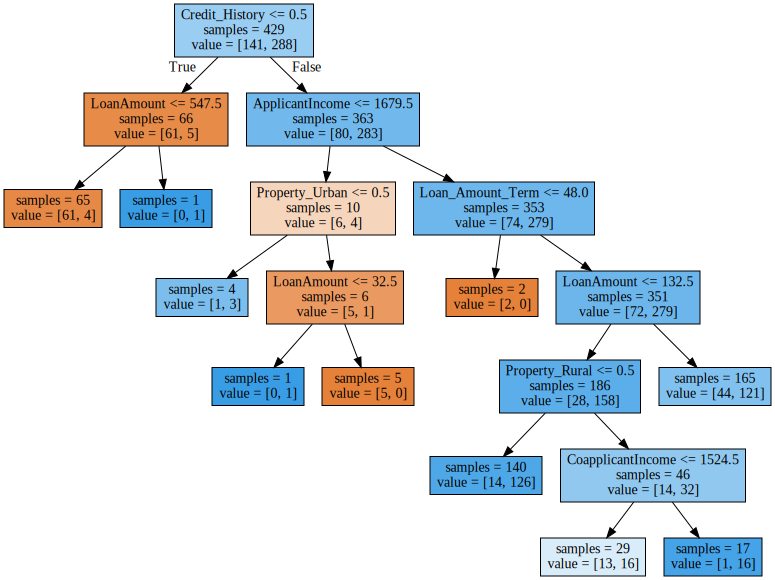

In [192]:
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [193]:
ran_for = RandomForestClassifier(n_estimators=10,max_depth=5)
ran_for.fit(X_train,y_train)
print("Training Accuracy = {}".format(ran_for.score(X_train,y_train)))
print('Testing Accuracy = {}'.format(ran_for.score(X_test,y_test)))

Training Accuracy = 0.8251748251748252
Testing Accuracy = 0.8216216216216217


In [222]:
gra_boo = GradientBoostingClassifier(n_estimators=10,max_depth=5)
gra_boo.fit(X_train,y_train)
print("Training Accuracy = {}".format(gra_boo.score(X_train,y_train)))
print('Testing Accuracy = {}'.format(gra_boo.score(X_test,y_test)))

Training Accuracy = 0.8391608391608392
Testing Accuracy = 0.8054054054054054


In [226]:
pred = pd.DataFrame({'Loan_Status':gra_boo.predict(test)})

In [270]:
answer = pd.concat([t,pred],axis=1)

In [229]:
answer['Loan_Status'][answer.Loan_Status==1]='Y'
answer['Loan_Status'][answer.Loan_Status==0]='N'

/home/arpit/virtual_env_/allenv3/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [230]:
answer.to_csv('solution.csv',index=False)

In [268]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(n_jobs=-1,penalty='l2')
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [269]:
print("Training Accuracy = {}".format(clf.score(X_train,y_train)))
print('Testing Accuracy = {}'.format(clf.score(X_test,y_test)))

Training Accuracy = 0.8065268065268065
Testing Accuracy = 0.8324324324324325


In [271]:
pred = pd.DataFrame({'Loan_Status':clf.predict(test)})
answer = pd.concat([t,pred],axis=1)
answer['Loan_Status'][answer.Loan_Status==1]='Y'
answer['Loan_Status'][answer.Loan_Status==0]='N'
answer.to_csv('solution_log_reg.csv',index=False)

/home/arpit/virtual_env_/allenv3/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
